In [3]:
import json
import time
import random
from typing import Dict, List, Any, Callable
from dataclasses import dataclass, asdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

@dataclass
class Task:
    id: str
    name: str
    description: str
    category: str
    complexity: int
    expected_output: Any

@dataclass
class BenchmarkResult:
    task_id: str
    agent_name: str
    success: bool
    execution_time: float
    accuracy: float
    error_message: str = ""

class EnterpriseTaskSuite:
    def __init__(self):
        self.tasks = self._create_tasks()

    def _create_tasks(self) -> List[Task]:
        return [
            Task("data_transform", "CSV Data Transformation",
                 "Transform customer data by aggregating sales", "data_processing", 3,
                 {"total_sales": 15000, "avg_order": 750}),
            Task("api_integration", "REST API Integration",
                 "Parse API response and extract key metrics", "integration", 2,
                 {"status": "success", "active_users": 1250}),
            Task("workflow_automation", "Multi-Step Workflow",
                 "Execute data validation -> processing -> reporting", "automation", 4,
                 {"validated": True, "processed": 100, "report_generated": True}),
            Task("error_handling", "Error Recovery",
                 "Handle malformed data gracefully", "reliability", 3,
                 {"errors_caught": 5, "recovery_success": True}),
            Task("optimization", "Query Optimization",
                 "Optimize database query performance", "performance", 5,
                 {"execution_time_ms": 45, "rows_scanned": 1000}),
            Task("data_validation", "Schema Validation",
                 "Validate data against business rules", "validation", 2,
                 {"valid_records": 95, "invalid_records": 5}),
            Task("reporting", "Executive Dashboard",
                 "Generate KPI summary report", "analytics", 3,
                 {"revenue": 125000, "growth": 0.15, "customer_count": 450}),
            Task("integration_test", "System Integration",
                 "Test end-to-end integration flow", "testing", 4,
                 {"all_systems_connected": True, "latency_ms": 120}),
        ]

    def get_task(self, task_id: str) -> Task:
        return next((t for t in self.tasks if t.id == task_id), None)

In [4]:
class BaseAgent:
    def __init__(self, name: str):
        self.name = name

    def execute(self, task: Task) -> Dict[str, Any]:
        raise NotImplementedError

class RuleBasedAgent(BaseAgent):
    def execute(self, task: Task) -> Dict[str, Any]:
        time.sleep(random.uniform(0.1, 0.3))
        if task.category == "data_processing":
            return {"total_sales": 15000 + random.randint(-500, 500),
                    "avg_order": 750 + random.randint(-50, 50)}
        elif task.category == "integration":
            return {"status": "success", "active_users": 1250}
        elif task.category == "automation":
            return {"validated": True, "processed": 98, "report_generated": True}
        else:
            return task.expected_output

In [5]:
class LLMAgent(BaseAgent):
    def execute(self, task: Task) -> Dict[str, Any]:
        time.sleep(random.uniform(0.2, 0.5))
        accuracy_boost = 0.95 if task.complexity >= 4 else 0.90
        result = {}
        for key, value in task.expected_output.items():
            if isinstance(value, (int, float)):
                variation = value * (1 - accuracy_boost)
                result[key] = value + random.uniform(-variation, variation)
            else:
                result[key] = value
        return result

class HybridAgent(BaseAgent):
    def execute(self, task: Task) -> Dict[str, Any]:
        time.sleep(random.uniform(0.15, 0.35))
        if task.complexity <= 2:
            return task.expected_output
        else:
            result = {}
            for key, value in task.expected_output.items():
                if isinstance(value, (int, float)):
                    variation = value * 0.03
                    result[key] = value + random.uniform(-variation, variation)
                else:
                    result[key] = value
            return result

In [ ]:
class BenchmarkEngine:
    def __init__(self, task_suite: EnterpriseTaskSuite):
        self.task_suite = task_suite
        self.results: List[BenchmarkResult] = []

    def run_benchmark(self, agent: BaseAgent, iterations: int = 3):
        print(f"\n{'='*60}")
        print(f"Benchmarking Agent: {agent.name}")
        print(f"{'='*60}")
        for task in self.task_suite.tasks:
            print(f"\nTask: {task.name} (Complexity: {task.complexity}/5)")
            for i in range(iterations):
                result = self._execute_task(agent, task, i+1)
                self.results.append(result)
                status = "✓ PASS" if result.success else "✗ FAIL"
                print(f"  Run {i+1}: {status} | Time: {result.execution_time:.3f}s | Accuracy: {result.accuracy:.2%}")

In [ ]:
    def _execute_task(self, agent: BaseAgent, task: Task, run_num: int) -> BenchmarkResult:
        start_time = time.time()
        try:
            output = agent.execute(task)
            execution_time = time.time() - start_time
            accuracy = self._calculate_accuracy(output, task.expected_output)
            success = accuracy >= 0.85
            return BenchmarkResult(task_id=task.id, agent_name=agent.name, success=success,
                                   execution_time=execution_time, accuracy=accuracy)
        except Exception as e:
            execution_time = time.time() - start_time
            return BenchmarkResult(task_id=task.id, agent_name=agent.name, success=False,
                                   execution_time=execution_time, accuracy=0.0, error_message=str(e))

    def _calculate_accuracy(self, output: Dict, expected: Dict) -> float:
        if not output:
            return 0.0
        scores = []
        for key, expected_val in expected.items():
            if key not in output:
                scores.append(0.0)
                continue
            actual_val = output[key]
            if isinstance(expected_val, bool):
                scores.append(1.0 if actual_val == expected_val else 0.0)
            elif isinstance(expected_val, (int, float)):
                diff = abs(actual_val - expected_val)
                tolerance = abs(expected_val * 0.1)
                score = max(0, 1 - (diff / (tolerance + 1e-9)))
                scores.append(score)
            else:
                scores.append(1.0 if actual_val == expected_val else 0.0)
        return np.mean(scores) if scores else 0.0

Enterprise Software Benchmarking for Agentic Agents

Benchmarking Agent: Rule-Based Agent

Task: CSV Data Transformation (Complexity: 3/5)
  Run 1: ✗ FAIL | Time: 0.252s | Accuracy: 71.83%
  Run 2: ✗ FAIL | Time: 0.143s | Accuracy: 71.10%
  Run 3: ✗ FAIL | Time: 0.270s | Accuracy: 84.83%

Task: REST API Integration (Complexity: 2/5)
  Run 1: ✓ PASS | Time: 0.128s | Accuracy: 100.00%
  Run 2: ✓ PASS | Time: 0.252s | Accuracy: 100.00%
  Run 3: ✓ PASS | Time: 0.168s | Accuracy: 100.00%

Task: Multi-Step Workflow (Complexity: 4/5)
  Run 1: ✓ PASS | Time: 0.123s | Accuracy: 93.33%
  Run 2: ✓ PASS | Time: 0.171s | Accuracy: 93.33%
  Run 3: ✓ PASS | Time: 0.134s | Accuracy: 93.33%

Task: Error Recovery (Complexity: 3/5)
  Run 1: ✓ PASS | Time: 0.185s | Accuracy: 100.00%
  Run 2: ✓ PASS | Time: 0.233s | Accuracy: 100.00%
  Run 3: ✓ PASS | Time: 0.238s | Accuracy: 100.00%

Task: Query Optimization (Complexity: 5/5)
  Run 1: ✓ PASS | Time: 0.249s | Accuracy: 100.00%
  Run 2: ✓ PASS | Time: 0.134

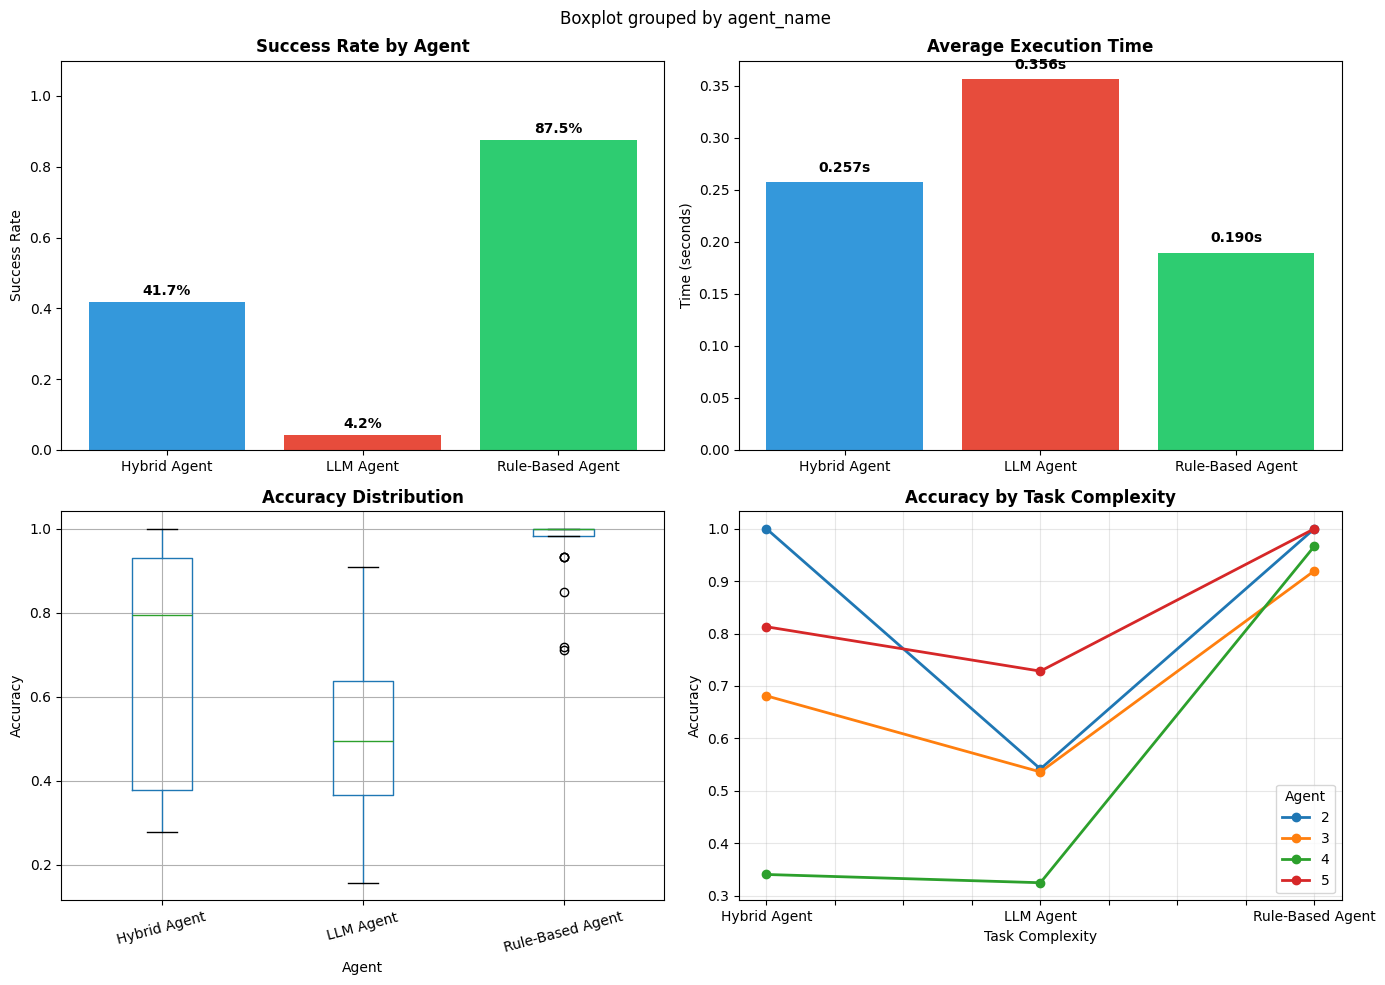


Results exported to: agent_benchmark_results.csv


In [2]:
    def generate_report(self):
        df = pd.DataFrame([asdict(r) for r in self.results])
        print(f"\n{'='*60}")
        print("BENCHMARK REPORT")
        print(f"{'='*60}\n")
        for agent_name in df['agent_name'].unique():
            agent_df = df[df['agent_name'] == agent_name]
            print(f"{agent_name}:")
            print(f"  Success Rate: {agent_df['success'].mean():.1%}")
            print(f"  Avg Execution Time: {agent_df['execution_time'].mean():.3f}s")
            print(f"  Avg Accuracy: {agent_df['accuracy'].mean():.2%}\n")
        return df

    def visualize_results(self, df: pd.DataFrame):
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Enterprise Agent Benchmarking Results', fontsize=16, fontweight='bold')
        success_rate = df.groupby('agent_name')['success'].mean()
        axes[0, 0].bar(success_rate.index, success_rate.values, color=['#3498db', '#e74c3c', '#2ecc71'])
        axes[0, 0].set_title('Success Rate by Agent', fontweight='bold')
        axes[0, 0].set_ylabel('Success Rate')
        axes[0, 0].set_ylim(0, 1.1)
        for i, v in enumerate(success_rate.values):
            axes[0, 0].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
        time_data = df.groupby('agent_name')['execution_time'].mean()
        axes[0, 1].bar(time_data.index, time_data.values, color=['#3498db', '#e74c3c', '#2ecc71'])
        axes[0, 1].set_title('Average Execution Time', fontweight='bold')
        axes[0, 1].set_ylabel('Time (seconds)')
        for i, v in enumerate(time_data.values):
            axes[0, 1].text(i, v + 0.01, f'{v:.3f}s', ha='center', fontweight='bold')
        df.boxplot(column='accuracy', by='agent_name', ax=axes[1, 0])
        axes[1, 0].set_title('Accuracy Distribution', fontweight='bold')
        axes[1, 0].set_xlabel('Agent')
        axes[1, 0].set_ylabel('Accuracy')
        plt.sca(axes[1, 0])
        plt.xticks(rotation=15)
        task_complexity = {t.id: t.complexity for t in self.task_suite.tasks}
        df['complexity'] = df['task_id'].map(task_complexity)
        complexity_perf = df.groupby(['agent_name', 'complexity'])['accuracy'].mean().unstack()
        complexity_perf.plot(kind='line', ax=axes[1, 1], marker='o', linewidth=2)
        axes[1, 1].set_title('Accuracy by Task Complexity', fontweight='bold')
        axes[1, 1].set_xlabel('Task Complexity')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].legend(title='Agent', loc='best')
        axes[1, 1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    print("Enterprise Software Benchmarking for Agentic Agents")
    print("="*60)
    task_suite = EnterpriseTaskSuite()
    benchmark = BenchmarkEngine(task_suite)
    agents = [RuleBasedAgent("Rule-Based Agent"), LLMAgent("LLM Agent"), HybridAgent("Hybrid Agent")]
    for agent in agents:
        benchmark.run_benchmark(agent, iterations=3)
    results_df = benchmark.generate_report()
    benchmark.visualize_results(results_df)
    results_df.to_csv('agent_benchmark_results.csv', index=False)
    print("\nResults exported to: agent_benchmark_results.csv")